In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [14]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [15]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [16]:
'{:%B %Y}'.format(curr_month)

'March 2018'

<h2>Основная таблица</h2>

In [17]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [18]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-03-31       41    372          7  -1   0     7    -42      67      -4

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

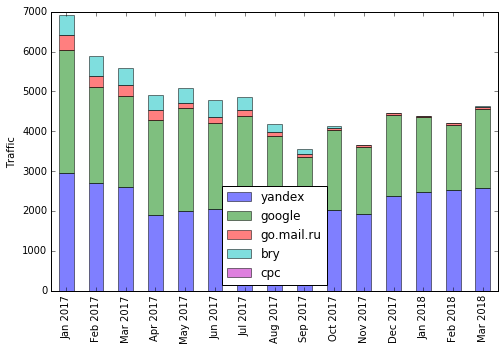

In [19]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

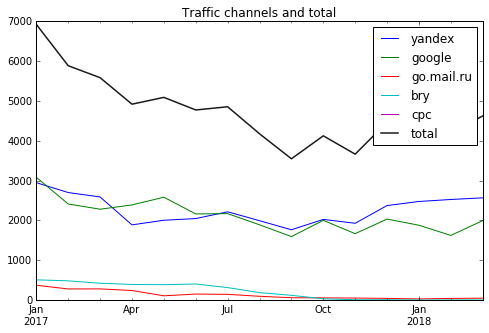

In [20]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [21]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                amazon      1
           1                             np - /?cnt=catalog&r=2438      1
           2     np - /?pid=menu-katalog&yclid=1049887899753132971      1
go.mail.ru 0                                             (not set)     51
google     0                                         дешевые двери    189
           1                             np - /?cnt=catalog&r=2438    187
           2                                       двери из дерева    154
           3                                      np - /?pid=pokaz    110
           4                                                np - /    105
           5                             np - /?cnt=catalog&r=1428     70
           6                                         двери продажа     57
           7                                         полотно двери     43
           8                                          двери дешево     42
           9                               np - /?pid=menu-katalog     10
           10                                      двери комнатные      7
           11                                   np - /?pid=service      6
           12                                    полотно для двери      6
           13                            np - /?cnt=catalog&r=1257      5
           14                                 np - /?pid=pricelist      5
           15                                      недорогие двери      5
           16                            np - /?cnt=catalog&r=3124      4
           17                             np - /?cnt=catalog&r=473      4
           18                                       двери в ванную      4
           19                               дверное полотно дешево      4
           20                            np - /?cnt=catalog&r=1010      3
           21                             np - /?cnt=catalog&r=530      3
           22                              np - /?cnt=catalog&r=57      3
           23                             np - /?cnt=catalog&r=999      3
           24                             np - /?cnt=catalog&r=109      2
           25                            np - /?cnt=catalog&r=1405      2
...                                                            ...    ...
yandex     2099     владимирская дверная компания официальный сайт      1
           2100                                  двери белые эмаль      1
           2101           двери дверной континент официальный сайт      1
           2102                                    двери для кухни      1
           2103             двери межкомнатные мдф эмаль под заказ      1
           2104                                     двери на кухню      1
           2105                          двери на кухню со стеклом      1
           2106                                двери эмалированные      1
           2107          двери эмалированные белые в москве дешево      1
           2108                     дверки для кухонного гарнитура      1
           2109                                    дверное полотно      1
           2110                дверное полотно 600х1900 для ванной      1
           2111                    дверное полотно 800х2000 купить      1
           2112               дверное полотно вита дуб натуральный      1
           2113                       дверное полотно глухое авито      1
           2114                             дверное полотно купить      1
           2115                             дверное полотно модерн      1
           2116             дверное полотно нестандартного размера      1
           2117                              дверное полотно турин      1
           2118          дверной лидер белоруссия официальный сайт      1
           2119                                  дверной рай склад      1
           2120                            дверцы для кухни купить      1
           2121                   дверцы для кухни купить отдел

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [22]:
data[kw].xs(0, level=1)

,keyword,visit
bing,amazon,1
go.mail.ru,(not set),51
google,дешевые двери,189
rambler,ldthb vt;rjvyfnyst c ecnfyjdrjq,1
yahoo,np - /,1
yandex,(not set),358


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [23]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                             amazon      1
           1                          np - /?cnt=catalog&r=2438      1
           2  np - /?pid=menu-katalog&yclid=1049887899753132971      1
go.mail.ru 0                                          (not set)     51
google     0                                      дешевые двери    189
           1                          np - /?cnt=catalog&r=2438    187
           2                                    двери из дерева    154
           3                                   np - /?pid=pokaz    110
           4                                             np - /    105
rambler    0                    ldthb vt;rjvyfnyst c ecnfyjdrjq      1
           1           vt;rjvyfnyst ldthb c ecnfyjdrjq ytljhjuj      1
yahoo      0                                             np - /      1
yandex     0                                          (not set)    358
           1         двери межкомнатные в приморском районе спб      2
           2                                http://took-took.ru      1
           3        http://www.took-took.ru/?cnt=catalog&r=1813      1
           4                                       took-took.ru      1